# Proyecto Final: Procesamiento de Datos - Grupo N°18

**Integrantes:**

    * Gutiérrez Diego - dgutierrez.m79@gmail.com - Git_user:Diego-wert89
    * Gutiérrez Laura - laurasgneco@gmail.com - Git_user:laurasg2022
    * Hilgemberg Maria Sol - shilgembergmariasol22@gmail.com - Git_user:sol-hilgemberg
    * Lara Mariela - marzular@gmail.com - Git_user:MARIELARA
    * Ruani Julio - julio.ruani@gmail.com - Git_user:immersSoftware
    * Sánchez Jorge Ignacio - nacho.sanchezsolano@gmail.com - Git_user:nachosanchezsolano
    * Valdiviezo Melisa - melisa.valdiviezo@gmail.com - Git_user:MEV-656

 **El proyecto consiste en desarrollar un procesamiento de datos que incluya las siguientes etapas:** 

**1) Recolección y preparación de datos: Obtener o recolectar conjuntos de datos relevantes para el tema elegido. Realizar las tareas de limpieza, integración y transformación necesarias para preparar los datos para el análisis.**

Para el proyecto utilizamos el siguiente dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

En la recolección se hace una carga del data set en la notebook que contiene un archivo csv listo para empezar el desarrollo.

In [229]:
#Primero importamos las librerias que se van a utilizar
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

#Leemos el data set con pandas (dataframe) y con el head mostramos los primeros 10 registros para evaluar el contenido.
data_df=pd.read_csv("../Data_Sets/ds_salaries.csv")

data_df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [230]:
#Analizamos las dimensiones del data set en el dataframe:

data_df.shape

#Como resultado tenemos 3755 filas y 11 columnas.

(3755, 11)

In [231]:
#Evaluamos los tipos de datos que hay en las columnas.

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Analizando el data set podemos concluir que tenemos lo siguiente:

1-El data set tiene 3755 filas y 11 columnas.

2-Contiene datos del tipo string(object) e int(enteros).

3-No tiene faltantes de datos.

Igualmente se procede hacer una doble verificación para ver si hay faltante de datos:

In [232]:
#Faltante de datos
data_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Finalmente se observa que no hay faltantes de datos en los campos del data set, por lo que se prosigue con la limpieza de datos.

**Limpieza**

Para su aplicación se van a evaluar los siguientes puntos:

-Columnas irrelevantes

-Cambio nombres de atributos.

-Registros repetidos.

-Valores extremos.



**Columnas irrelevantes:** observamos que las columnas "salary" y "salary_currency" no son necesarias para el analisis, ya que la columna salary_in_usd se encarga de representar el salario de los empleados de forma comparativa. 

In [233]:
#Se procede a eliminar las columnas "salary" y "salary_currency" porque no son relevantes.

data_df.drop(data_df[['salary','salary_currency']], axis = 1, inplace = True)
data_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [234]:
#Verificación del borrado de los campos anteriores.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB


**Cambio de nombres en atributos:** para un mejor analisis se procede a cambiar el nombre de los atributos para traducirlos de ingles a español, con el fin de que se adapte al lector objetivo.

In [235]:
#Cambio de nombres en los atributos:

data_df.rename(columns={'work_year':'Año_de_trabajo','experience_level':'Nivel_de_experiencia','employment_type':'Tipo_de_empleo','job_title':'Título_de_trabajo','salary_in_usd':'Salario_en_usd','employee_residence':'Residencia_empleado','remote_ratio':'Ratio_remoto','company_location':'Ubicación_empresa','company_size':'tamaño_de_empresa'}, inplace = True)
data_df

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


**Registros repetidos:** se debe verificar que no se repitan registros en el data set, porque podrian perjudicar el resultado del análisis.

In [236]:
# Verificación de registros duplicados
duplicados = data_df[data_df.duplicated()]
if not duplicados.empty:
    print("Hay registros duplicados encontrados:")
    duplicados_df = pd.DataFrame(duplicados)
    display(duplicados_df)
else:
    print("No se encontraron registros duplicados en el dataset.")

Hay registros duplicados encontrados:


,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
115,2023,SE,FT,Data Scientist,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,US,100,US,L


In [237]:
#Eliminamos los registros duplicados:

data_df.drop_duplicates(inplace=True)

In [238]:
# Verificación nuevamente si hay registros duplicados.
duplicados = data_df[data_df.duplicated()]
if not duplicados.empty:
    print("Hay registros duplicados encontrados:")
    duplicados_df = pd.DataFrame(duplicados)
    display(duplicados_df)
else:
    print("No se encontraron registros duplicados en el dataset.")

No se encontraron registros duplicados en el dataset.


**Valores extremos:** nos permite ver si hay datos que no son adecuados, valores fuera de un rango, etc.

Por ejemplo: en el salario no puede haber un valor negativo.

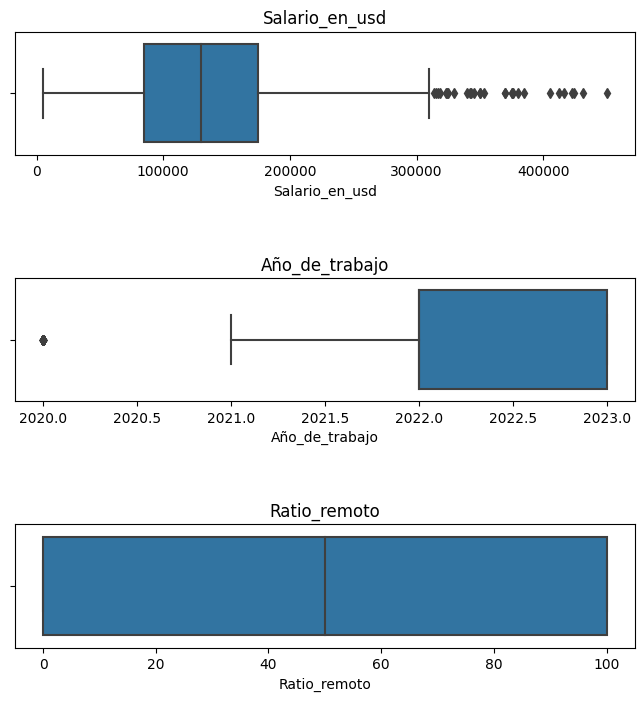

In [227]:
# Valores extremos
# Tomamos las columnas con varibles numéricas que queremos analizar
cols_num = ['Salario_en_usd', 'Año_de_trabajo', 'Ratio_remoto']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sbn.boxplot(x=col, data=data_df, ax=ax[i])
    ax[i].set_title(col)

In [228]:
#También utilizamos "IQR method" para detectar Outliers
q1,q2,q3=data_df['Salario_en_usd'].quantile([0.25,0.5,0.75])
print('Q1: ',q1,'\nQ2: ',q2, '\nQ3: ',q3)

Q1:  84975.0 
Q2:  130000.0 
Q3:  175000.0


In [141]:
#calculamos el rango intercuartil, como medida de dispersion
iqr=q3-q1
iqr

90025.0

In [173]:
#establecemos los rangos para determinar valores normales o atípicos
# atípico leve
li=q1-(1.5*iqr)
ls=q3+(1.5*iqr)
print ('limite superior leve: ',ls,'limite inferior leve: ',li)

limite superior leve:  310037.5 limite inferior leve:  -50062.5


In [174]:
#buscamos los salarios que sean distantes de los limites leves calculados
data_df.query('(Salario_en_usd<@li) or (Salario_en_usd>@ls)') 

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
33,2023,SE,FT,Computer Vision Engineer,342810,US,0,US,M
133,2023,SE,FT,Machine Learning Engineer,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,318300,US,100,US,M
228,2023,EX,FT,Head of Data,329500,US,0,US,M
478,2023,EX,FT,Director of Data Science,353200,US,0,US,M
488,2023,SE,FT,Data Scientist,317070,US,0,US,M
528,2023,SE,FT,AI Scientist,423834,IL,0,IL,L
649,2023,SE,FT,Data Architect,376080,US,100,US,M
845,2023,MI,FT,Research Scientist,340000,US,100,US,M
1105,2023,SE,FT,Data Scientist,370000,US,0,US,M


In [175]:
#atípicos extremos
li=q1-(3*iqr)
ls=q3+(3*iqr)
print ('limite superior extremo: ',ls,'limite inferior extremo: ',li)

limite superior extremo:  445075.0 limite inferior extremo:  -185100.0


In [176]:
#buscamos los salarios que sean distantes de los limites extremos calculados
data_df.query('(Salario_en_usd<@li) or (Salario_en_usd>@ls)') 

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
3522,2020,MI,FT,Research Scientist,450000,US,0,US,M


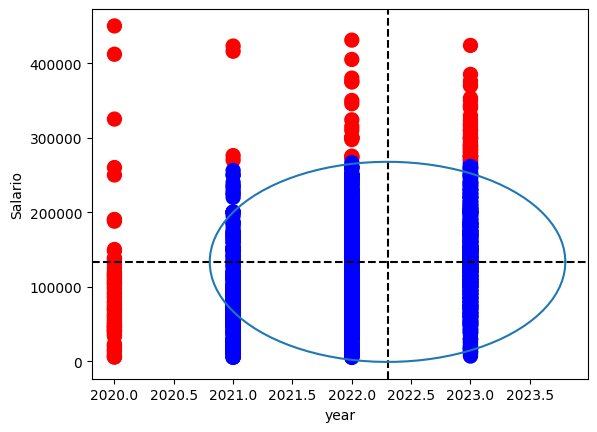

In [239]:
from math import pi
 
salary = data_df['Salario_en_usd']
year=data_df['Año_de_trabajo']
media = (salary).mean()
std_x = (salary).std()*2
media_y = (year).mean()
std_y = (year).std()*2
 
colors = ['blue']*len(salary)
for index, x in enumerate(salary):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(year):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.scatter(year, salary, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('year')
plt.ylabel('Salario')
plt.show()

#Dentro del circulo azul, los valores que están en la media y en rojo los outliers: valores que superan en más de 2 veces el desvío estándar.

**Conclusión Valores extremos:** No se detectan valores negativos en salarios, y dado que la variable analizada puede estar relacionada a otras variables como el título, nivel de experiencia , es que NO excluiremos estos valores atípicos.